A data set describing the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019.
The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 27 parties involved in the electoral event.So we will use regression models to predict final number of elected MP's in a district/national-level which is our target.

In [7]:
#importing all the libraries and loading the csv file

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
import numpy as np

In [10]:
df=pd.read_csv('election.csv',names=range(0,28),header=0)  #reading the csv file 

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


EDA PROCESS

In [12]:
df.dtypes

0       int64
1      object
2      object
3       int64
4       int64
5       int64
6       int64
7       int64
8     float64
9       int64
10    float64
11    float64
12      int64
13      int64
14      int64
15    float64
16      int64
17    float64
18    float64
19      int64
20      int64
21     object
22      int64
23    float64
24    float64
25      int64
26      int64
27      int64
dtype: object

In [13]:
df.drop(1,axis=1,inplace=True)

In [16]:
df.drop(0,axis=1,inplace=True)

In [17]:
df.head()

,2,3,4,5,6,7,8,9,10,11,...,18,19,20,21,22,23,24,25,26,27
0,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [15]:
df[27].unique()

array([106,  77,  19,   5,  12,   4,   1,   0,   6,   7,   2,   8,   3,
        20,  17,  15,   9], dtype=int64)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       3504 non-null   object 
 1   3       3504 non-null   int64  
 2   4       3504 non-null   int64  
 3   5       3504 non-null   int64  
 4   6       3504 non-null   int64  
 5   7       3504 non-null   int64  
 6   8       3504 non-null   float64
 7   9       3504 non-null   int64  
 8   10      3504 non-null   float64
 9   11      3504 non-null   float64
 10  12      3504 non-null   int64  
 11  13      3504 non-null   int64  
 12  14      3504 non-null   int64  
 13  15      3504 non-null   float64
 14  16      3504 non-null   int64  
 15  17      3504 non-null   float64
 16  18      3504 non-null   float64
 17  19      3504 non-null   int64  
 18  20      3504 non-null   int64  
 19  21      3504 non-null   object 
 20  22      3504 non-null   int64  
 21  23      3504 non-null   float64
 22  

In [19]:
df.shape

(3504, 26)

In [20]:
#from the above we can see that no null value is present in the dataset

In [21]:
#converting the catagorical value to numerical value

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()

In [24]:
df[2]=le.fit_transform(df[2])
df[21]=le.fit_transform(df[21])

In [26]:
df.dtypes

2       int32
3       int64
4       int64
5       int64
6       int64
7       int64
8     float64
9       int64
10    float64
11    float64
12      int64
13      int64
14      int64
15    float64
16      int64
17    float64
18    float64
19      int64
20      int64
21      int32
22      int64
23    float64
24    float64
25      int64
26      int64
27      int64
dtype: object

In [27]:
#importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

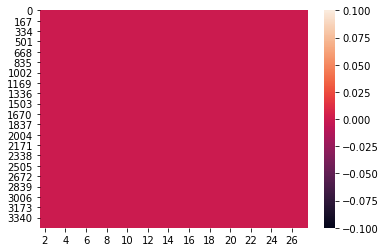

In [28]:
sns.heatmap(df.isna())

In [29]:
df.describe()

,2,3,4,5,6,7,8,9,10,11,...,18,19,20,21,22,23,24,25,26,27
count,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,...,3504.000000,3.504000e+03,3.504000e+03,3504.000000,3504.000000,3504.000000,3504.000000,3504.000000,3504.00000,3504.000000
mean,10.364726,0.106450,23.465468,314.350742,107.789384,1045.402397,2.447123,924.944920,2.168610,51.883944,...,54.084506,8.580718e+04,4.526591e+04,10.119578,0.005137,4.954983,5.193827,1928.527968,1.15097,1.150970
std,5.863610,0.966657,49.537339,668.250422,251.401108,3219.732277,0.811443,2567.087684,0.516861,4.219284,...,5.008850,2.448900e+05,1.316365e+05,6.141237,0.151034,10.915866,11.443283,14040.617995,6.69952,6.970988
min,0.000000,0.000000,2.000000,54.000000,3.000000,19.000000,0.550000,39.000000,1.340000,37.150000,...,43.570000,6.383000e+03,3.215000e+03,0.000000,0.000000,0.020000,0.020000,1.000000,0.00000,0.000000
25%,5.000000,0.000000,4.000000,75.000000,12.000000,138.000000,1.910000,117.000000,1.750000,49.120000,...,50.155000,1.419100e+04,8.146000e+03,4.000000,0.000000,0.220000,0.230000,27.000000,0.00000,0.000000
50%,10.000000,0.000000,9.000000,147.000000,32.000000,291.000000,2.490000,284.000000,2.160000,52.240000,...,55.080000,2.257600e+04,1.231400e+04,11.000000,0.000000,0.530000,0.550000,92.000000,0.00000,0.000000
75%,15.000000,0.000000,18.000000,242.000000,96.000000,735.000000,2.890000,779.000000,2.490000,55.480000,...,57.400000,6.783400e+04,3.243900e+04,15.000000,0.000000,2.390000,2.500000,492.000000,0.00000,0.000000
max,20.000000,12.000000,226.000000,3092.000000,2131.000000,36878.000000,5.380000,27702.000000,3.350000,59.450000,...,62.580000,2.697514e+06,1.467094e+06,20.000000,6.000000,49.110000,51.420000,513915.000000,94.00000,106.000000


From the above we can see that outliers is present in the dataset which we will visualise through boxplots plot further, as the values are deviating from 3rd quartile to max value and also the data is skewed as mean is greater than median and vice versa.

In [30]:
#data visualisation

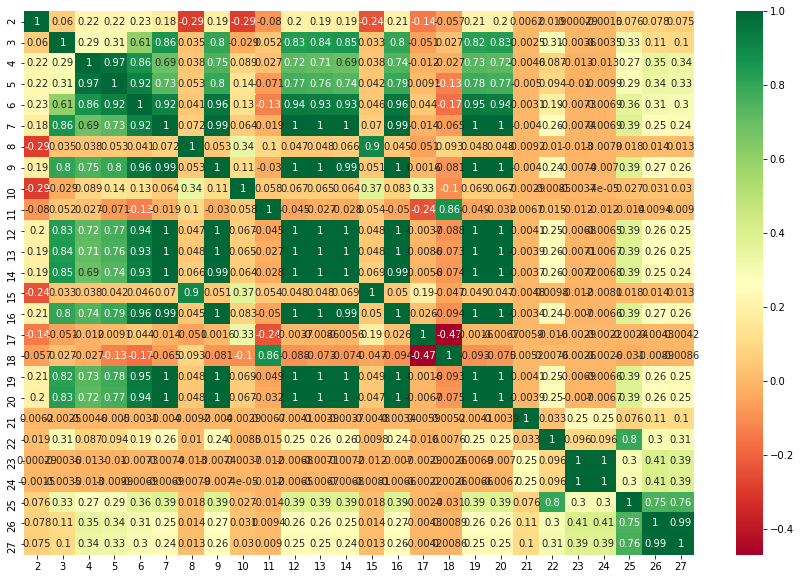

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [32]:
#from the above we can see that most of the values are positively corrrelated amongst each other

Text(0.5, 1.0, 'pre.subscribedVoters')

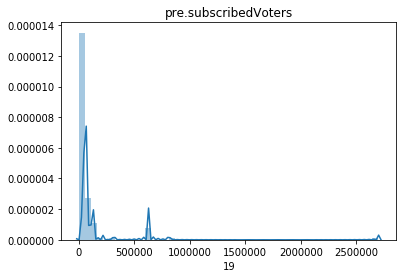

In [37]:
sns.distplot(df[19])
plt.title('pre.subscribedVoters')

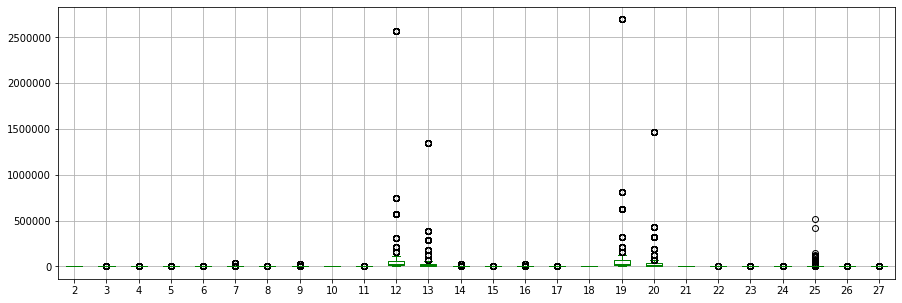

In [41]:
df.boxplot(figsize=(15,5),color='green')      #shows outliers in the columns

Text(0, 0.5, 'FinalMandates')

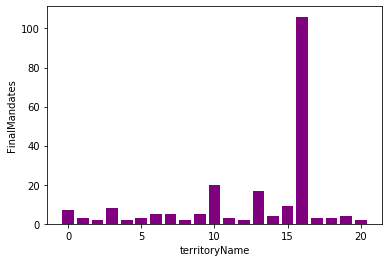

In [51]:
plt.bar(df[2],df[27],color='purple')
plt.xlabel('territoryName')
plt.ylabel('FinalMandates')

Text(0.5, 1.0, 'Parties')

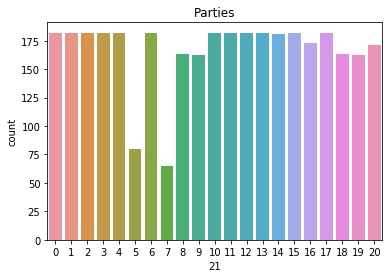

In [62]:
sns.countplot(df[21])
plt.title('Parties')

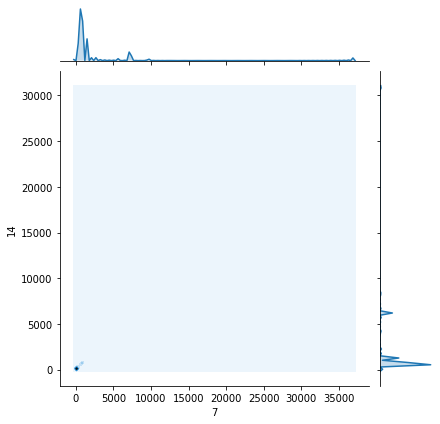

In [55]:
sns.jointplot(df[7],df[14],kind="kde")
plt.show()

In [56]:
df.head()

,2,3,4,5,6,7,8,9,10,11,...,18,19,20,21,22,23,24,25,26,27
0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,17,0,38.29,40.22,147993,94,106
1,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,15,0,33.28,34.95,128624,81,77
2,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,1,0,6.81,7.15,26307,16,19
3,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,2,0,4.90,5.14,18923,12,5
4,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,11,0,4.59,4.83,17757,11,12


<Figure size 360x720 with 0 Axes>

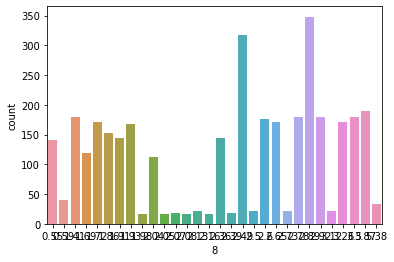

<Figure size 360x720 with 0 Axes>

In [61]:
sns.countplot(df[8])   #count of % of null votes

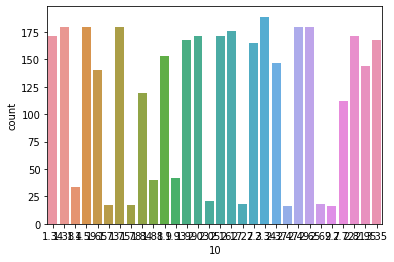

In [59]:
sns.countplot(df[10])  #count of blank votes%

Text(0, 0.5, 'votes')

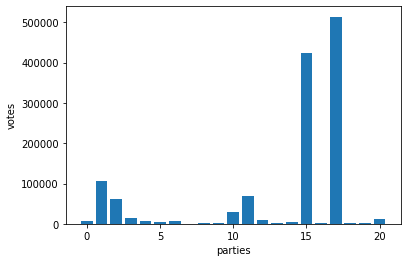

In [65]:
plt.bar(df[21],df[25])
plt.xlabel('parties')
plt.ylabel('votes')

In [66]:
#removing the outliers

In [67]:
from scipy.stats import zscore

In [68]:
z=np.abs(zscore(df))

In [69]:
threshold=3
print(np.where(z>3))

(array([   0,    0,    0, ..., 3472, 3473, 3473], dtype=int64), array([ 2,  3,  4, ..., 22, 21, 22], dtype=int64))


In [70]:
df_new=df[(z<3).all(axis=1)]

In [71]:
df_new.shape   #shape of the df after removing outliers

(3112, 26)

In [72]:
df.shape  #original shape of the dataset

(3504, 26)

In [75]:
#splitting the dataset in x and y

In [76]:
x=df.drop(27,axis=1)
x.head()

,2,3,4,5,6,7,8,9,10,11,...,17,18,19,20,21,22,23,24,25,26
0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,1.91,52.66,813743,428546,17,0,38.29,40.22,147993,94
1,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,1.91,52.66,813743,428546,15,0,33.28,34.95,128624,81
2,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,1.91,52.66,813743,428546,1,0,6.81,7.15,26307,16
3,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,1.91,52.66,813743,428546,2,0,4.90,5.14,18923,12
4,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,1.91,52.66,813743,428546,11,0,4.59,4.83,17757,11


In [77]:
y=df[27].values
y=y.reshape(-1,1)
y.shape

(3504, 1)

In [78]:
x.shape

(3504, 25)

In [73]:
#using dimensionality redution technique will reduce the dimension of the dataset

In [74]:
from sklearn.decomposition import PCA

In [79]:
pca=PCA(n_components=9)

In [80]:
x=pca.fit_transform(x)
x=pd.DataFrame(data=x)
x.head()

,0,1,2,3,4,5,6,7,8
0,1.119737e+06,129962.174348,-13808.619115,-3422.119828,413.061911,330.221250,230.318776,120.813385,-107.533548
1,1.119459e+06,110595.492024,-13694.635665,-3416.451371,412.784072,329.625432,231.074210,121.179236,-107.098577
2,1.117994e+06,8290.736395,-13092.517298,-3386.508943,411.315908,326.492780,235.057715,123.099730,-104.811751
3,1.117888e+06,907.620378,-13049.063829,-3384.348388,411.209849,326.268641,235.344648,123.237399,-104.652144
4,1.117871e+06,-258.239815,-13042.202050,-3384.007366,411.193096,326.229071,235.393199,123.264678,-104.636566


In [81]:
#performing standardisation of the data to bring mean to 0 and std and var to 1

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
std=StandardScaler()

In [84]:
x=std.fit_transform(x)
x=pd.DataFrame(data=x)
x.head()

,0,1,2,3,4,5,6,7,8
0,2.938626,10.046416,-2.463810,-1.813317,0.613383,1.573072,1.759575,1.103705,-1.574114
1,2.937898,8.549321,-2.443472,-1.810313,0.612970,1.570234,1.765346,1.107047,-1.567747
2,2.934053,0.640896,-2.336039,-1.794447,0.610790,1.555311,1.795779,1.124592,-1.534271
3,2.933775,0.070161,-2.328286,-1.793302,0.610632,1.554243,1.797971,1.125849,-1.531935
4,2.933731,-0.019963,-2.327062,-1.793122,0.610607,1.554055,1.798342,1.126099,-1.531707


In [86]:
y=std.fit_transform(y)
y=pd.DataFrame(data=y)

In [87]:
#now with the help of linear regression we will build our model and check the accuracy

In [88]:
#importing all required libraries

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [92]:
max_r2_scr=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    print("the r2 score corrosponding to the random state",r_state,"is:",r2_scr)
    if r2_scr>max_r2_scr:
        max_r2_scr=r2_scr
        final_r_state=r_state

print()
print()
print("maximum r2 score for the random state",final_r_state,"is:",max_r2_scr)

the r2 score corrosponding to the random state 42 is: 0.6061459881006518
the r2 score corrosponding to the random state 43 is: 0.6377813506217694
the r2 score corrosponding to the random state 44 is: 0.5748410806479907
the r2 score corrosponding to the random state 45 is: 0.6366310227443714
the r2 score corrosponding to the random state 46 is: 0.6316924655185489
the r2 score corrosponding to the random state 47 is: 0.5408884060658556
the r2 score corrosponding to the random state 48 is: 0.5121395681045703
the r2 score corrosponding to the random state 49 is: 0.561222009020065
the r2 score corrosponding to the random state 50 is: 0.6183909924777218
the r2 score corrosponding to the random state 51 is: 0.6225329841944021
the r2 score corrosponding to the random state 52 is: 0.5967927902307906
the r2 score corrosponding to the random state 53 is: 0.6529774862973645
the r2 score corrosponding to the random state 54 is: 0.6162858128938762
the r2 score corrosponding to the random state 55 is

From the above we can see that our linear regressor model is predicting with accuracy of 68% at a random state of 97.
will also check with other models too, whether the accuracy remains same or not.

In [93]:
x_train.shape

(2452, 9)

In [94]:
y_train.shape

(2452, 1)

In [95]:
x_test.shape

(1052, 9)

In [96]:
y_test.shape

(1052, 1)

In [97]:
lr.coef_

array([[ 0.21122765,  0.63516819, -0.16292363, -0.106615  , -0.00944841,
         0.11733257, -0.03229554, -0.04065997, -0.04178791]])

In [98]:
lr.intercept_

array([-0.00461071])

In [99]:
from math import sqrt
print(sqrt(mean_absolute_error(y_test,pred)))   #rms error

0.4272810244218337


In [100]:
print(mean_absolute_error(y_test,pred))

0.18256907383097162


In [104]:
#performing regularisation by finding the best hyper parameter with gridsearch cv

In [102]:
from sklearn.linear_model import Lasso,Ridge

In [103]:
from sklearn.model_selection import GridSearchCV

In [105]:
ls=Lasso()
rg=Ridge()

In [106]:
params={'alpha':[1.0,0.1,0.01,0.001]}

In [107]:
gd=GridSearchCV(estimator=ls,param_grid=params)
gd1=GridSearchCV(estimator=rg,param_grid=params)

In [108]:
gd.fit(x,y)
gd1.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [109]:
gd.best_estimator_

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [110]:
gd1.best_estimator_

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [111]:
gd1.best_score_

-0.7745158663957113

In [112]:
#using cross valid score

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
score=cross_val_score(lr,x,y,cv=5)

In [115]:
score

array([ 0.69064034,  0.64412419,  0.64583294,  0.63637271, -6.50516074])

In [116]:
#cross val score is giving 69%

In [117]:
#checking the r2 scores with other models

In [118]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [119]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=97,test_size=0.20)
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,"score",r2_score(y_test,pred))
    print(i,"abs error",mean_absolute_error(y_test,pred))
    print(i,"sq error",mean_squared_error(y_test,pred))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') score 0.9941033757609297
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') abs error 0.008759784106951322
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') sq error 0.0052221186498604
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) score 0.9598566421198346
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) abs error 0.08624539868856387
SVR(C=1.0, 

In [121]:
#KNN is giving 99.4% r2 scor, svr is giving 96% r3 score and dtr is giving the max of 99.42%

In [122]:
#find r2 scores at different n_neighbors for KNN

In [123]:
for i in range(2,22):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    print("r2 score at neighbor",i,"is:",r2_score(y_test,pred))

r2 score at neighbor 2 is: 0.999171077339312
r2 score at neighbor 3 is: 0.998714248850755
r2 score at neighbor 4 is: 0.9980582486673383
r2 score at neighbor 5 is: 0.9941033757609297
r2 score at neighbor 6 is: 0.9876545785068198
r2 score at neighbor 7 is: 0.9803697580517883
r2 score at neighbor 8 is: 0.9726921790969592
r2 score at neighbor 9 is: 0.9654709707287132
r2 score at neighbor 10 is: 0.9587770129458564
r2 score at neighbor 11 is: 0.9616708901938061
r2 score at neighbor 12 is: 0.9580261195382944
r2 score at neighbor 13 is: 0.9676474918940937
r2 score at neighbor 14 is: 0.9685012772296352
r2 score at neighbor 15 is: 0.9634578471082438
r2 score at neighbor 16 is: 0.9560275956379867
r2 score at neighbor 17 is: 0.9459650271224638
r2 score at neighbor 18 is: 0.9347971481825424
r2 score at neighbor 19 is: 0.919252737789116
r2 score at neighbor 20 is: 0.9027442449590624
r2 score at neighbor 21 is: 0.88561220655431


In [124]:
#knn is giving a almost 100% r2 score at n_neighbor=2

In [125]:
#using other models will check the r2 score

In [126]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor

In [127]:
a=AdaBoostRegressor(n_estimators=150,learning_rate=0.01)
a.fit(x_train,y_train)
predad=a.predict(x_test)
print("r2 score is:",r2_score(y_test,predad))

r2 score is: 0.9637700256451951


In [128]:
#from the above we can see that adaboost model is giving r2 score of 96%

In [129]:
l=[0.1,0.01,1.0]
for i in l:
    gd=GradientBoostingRegressor(learning_rate=i)
    gd.fit(x_train,y_train)
    predgd=gd.predict(x_test)
    print("r2 score at lerning rate",i,"is:",r2_score(y_test,predgd))

r2 score at lerning rate 0.1 is: 0.9925802229875236
r2 score at lerning rate 0.01 is: 0.8502140738972934
r2 score at lerning rate 1.0 is: 0.9836313172506705


In [130]:
#gradient boost regressor is giving a max of 99.2% r2 score at l_rate of 0.1

In [132]:
rd=RandomForestRegressor(n_estimators=200)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is:',r2_score(y_test,predrd))

r2 score is: 0.9937336215453673


In [133]:
#from the below DataFrame we will finalise our model

In [134]:
a={'model':('lin reg','knn','svr','dtr','adaboostreg','gdboostreg','rdboost'),'r2_score in %':[67,99.9,95,99.4,96,99,99]}

In [135]:
results=pd.DataFrame(data=a)

In [136]:
results

,model,r2_score in %
0,lin reg,67.0
1,knn,99.9
2,svr,95.0
3,dtr,99.4
4,adaboostreg,96.0
5,gdboostreg,99.0
6,rdboost,99.0


In [137]:
#from the above we will select KNN regressor as our final model for prediction and will dump the same 
#using serialisation.

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=97,test_size=0.20)

In [139]:
knn=KNeighborsRegressor(n_neighbors=2)

In [142]:
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
a1=pd.DataFrame(data=predknn)
a1.to_csv('pred_election_knn_result.csv')  #saving the predicted result in csv form

In [141]:
r2_score(y_test,predknn)

0.999171077339312

In [144]:
from math import sqrt
print(sqrt(mean_squared_error(y_test,predknn)) )  #root mean square error

0.02709434440823396


In [145]:
mean_absolute_error(y_test,predknn)

0.002456014235593828

In [146]:
#dumping the final model for prediction

In [147]:
from sklearn.externals import joblib

In [148]:
joblib.dump(knn,'election_knn.obj')

['election_knn.obj']